__Final Project, Part 2: Project Design Writeup__

>Problem Statement: 
Use the breast cancer data set to derive a model that will predict if a sample ID is a malignant or benign tumor.

>Potential Models: 
Categorical techniques such as logistic regression or CART will be used since the target is categorical. 

>Explanation of extant data: 
The data set describes visual attributes of patient breast cancer cells, such as radius of cell nucleus, texture of nucleus, compactness, smoothness, and texture. More work is needed to understand the meaning of these attributes and how they relate to the problem. However, the focus is on constructing a model, even at the expense of understanding the problem. This is not ideal, but it is better to prioritize the techniques we are learning. 

>Outstanding questions, assumptions, risks, caveats:
The assumption is that the data is real, useable, and that the goal of constructing a model can be met. 
Still need to determine some of the characteristics of the data, such as if the features are normally distributed.

>Relevant Domain knowledge:
Biology background, basic understandning of cancer, biotechnology professional. 

>Success is a working model that can predict if a tumor is malignant or benign.
Even if the model doesn't work well, it will be worth it to have learned some techniques.. 

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

In [17]:
df = pd.read_csv('data_breast_cancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [18]:
#Verify that the read_csv function returns a data frame.
type(df)

pandas.core.frame.DataFrame

In [19]:
#Number of Rows, columns
df.shape

(569, 33)

In [20]:
df.dtypes

id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

In [21]:
#missing (null)values in dataframe.
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [22]:
#General descriptive statistics about dataframe.
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [23]:
#This function creates a dataframe that displays the mean, median, an diffenrce beteen the two in order to know
#if the data is normally distributed.

cols_to_keep = df.columns[2:12]
df_cols = df[cols_to_keep]

lst_index = ['mean', 'median', '|mean-median|']
def is_it_normal(d_frame, lst_index):
    out_df = pd.DataFrame(index=lst_index)
    for col in df_cols.columns:
        lst_col = []
        curr_mean = d_frame[col].mean()
        curr_median = d_frame[col].median()
        curr_diff = abs(curr_mean - curr_median)
        lst_col.append(curr_mean)
        lst_col.append(curr_median)
        lst_col.append(curr_diff)
        out_df[col] = lst_col
    return out_df
is_it_normal(df_cols, lst_index)
#   return dct_col
#dict_for_df(df_cols)

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
mean,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,0.062798
median,13.370000,18.840000,86.240000,551.100000,0.09587,0.092630,0.061540,0.033500,0.179200,0.061540
|mean-median|,0.757292,0.449649,5.729033,103.789104,0.00049,0.011711,0.027259,0.015419,0.001962,0.001258


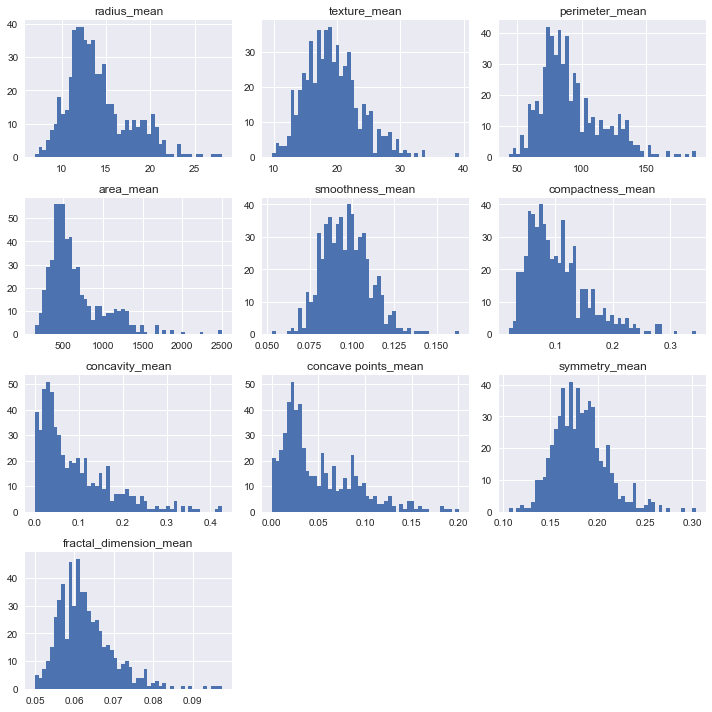

In [24]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = fig.add_subplot(4,3,1)
_ = ax1.hist(df['radius_mean'], bins=50)
ax1.set_title('radius_mean')
ax2 = fig.add_subplot(4,3,2)
_ = ax2.hist(df['texture_mean'], bins=50)
ax2.set_title('texture_mean')
ax3 = fig.add_subplot(4,3,3)
_ = ax3.hist(df['perimeter_mean'], bins=50)
ax3.set_title('perimeter_mean')
ax4 = fig.add_subplot(4,3,4)
_ = ax4.hist(df['area_mean'], bins=50)
ax4.set_title('area_mean')
ax5 = fig.add_subplot(4,3,5)
_ = ax5.hist(df['smoothness_mean'], bins=50)
ax5.set_title('smoothness_mean')
ax6 = fig.add_subplot(4,3,6)
_ = ax6.hist(df['compactness_mean'], bins=50)
ax6.set_title('compactness_mean')
ax7 = fig.add_subplot(4,3,7)
_ = ax7.hist(df['concavity_mean'], bins=50)
ax7.set_title('concavity_mean')
ax8 = fig.add_subplot(4,3,8)
_ = ax8.hist(df['concave points_mean'], bins=50)
ax8.set_title('concave points_mean')
ax9 = fig.add_subplot(4,3,9)
_ = ax9.hist(df['symmetry_mean'], bins=50)
ax9.set_title('symmetry_mean')
ax10 = fig.add_subplot(4,3,10)
_ = ax10.hist(df['fractal_dimension_mean'], bins=50)
ax10.set_title('fractal_dimension_mean')
plt.tight_layout()

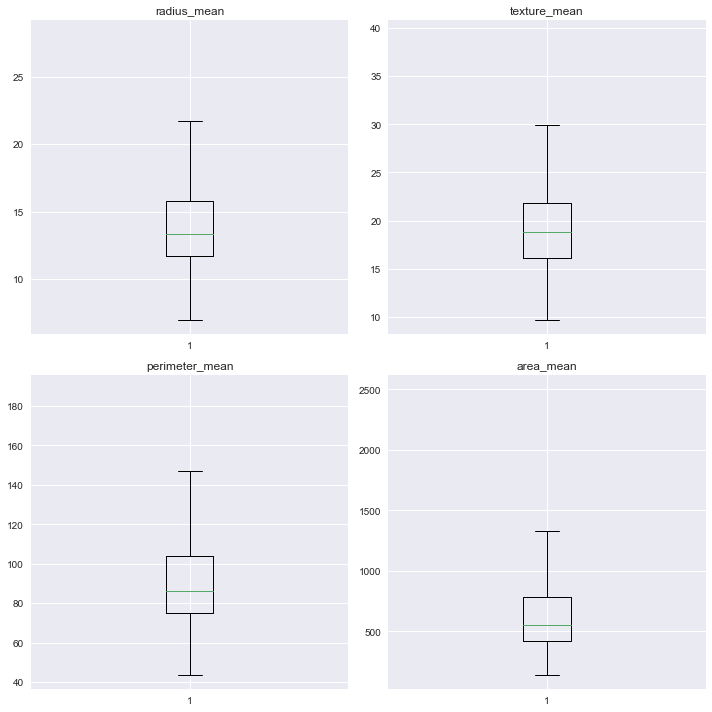

In [25]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax1 = fig.add_subplot(2,2,1)
_ = ax1.boxplot(df['radius_mean'])
ax1.set_title('radius_mean')
ax2 = fig.add_subplot(2,2,2)
_ = ax2.boxplot(df['texture_mean'])
ax2.set_title('texture_mean')
ax3 = fig.add_subplot(2,2,3)
_ = ax3.boxplot(df['perimeter_mean'])
ax3.set_title('perimeter_mean')
ax4 = fig.add_subplot(2,2,4)
_ = ax4.boxplot(df['area_mean'])
ax4.set_title('area_mean')
plt.tight_layout()

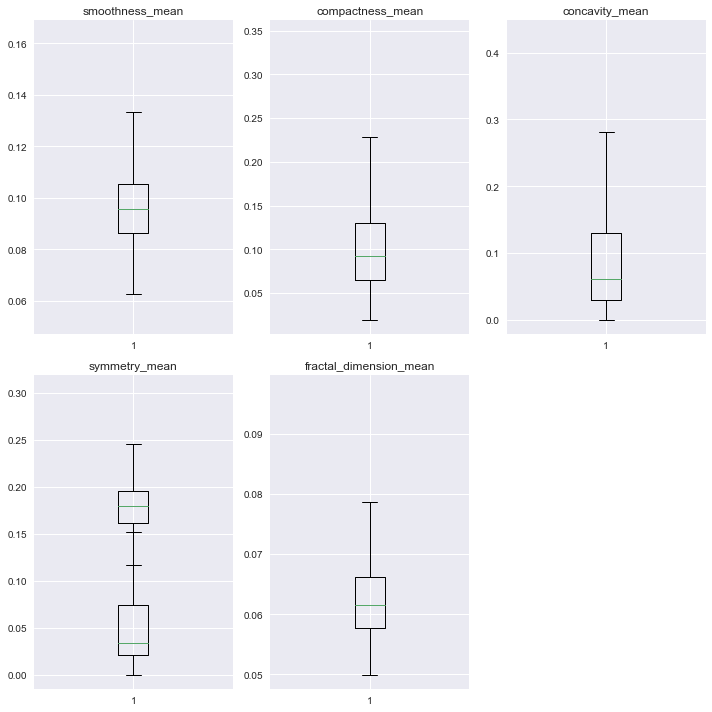

In [26]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax5 = fig.add_subplot(2,3,1)
_ = ax5.boxplot(df['smoothness_mean'])
ax5.set_title('smoothness_mean')
ax6 = fig.add_subplot(2,3,2)
_ = ax6.boxplot(df['compactness_mean'])
ax6.set_title('compactness_mean')
ax7 = fig.add_subplot(2,3,3)
_ = ax7.boxplot(df['concavity_mean'])
ax7.set_title('concavity_mean')
ax8 = fig.add_subplot(2,3,4)
_ = ax8.boxplot(df['concave points_mean'])
ax8.set_title('concave points_mean')
ax9 = fig.add_subplot(2,3,4)
_ = ax9.boxplot(df['symmetry_mean'])
ax9.set_title('symmetry_mean')
ax10 = fig.add_subplot(2,3,5)
_ = ax10.boxplot(df['fractal_dimension_mean'])
ax10.set_title('fractal_dimension_mean')
plt.tight_layout()

In [27]:
#Correlation Matrix...same as covariance matrix?
cols_to_keep = df.columns[2:12]
df_cols = df[cols_to_keep]
df_corr = df_cols.corr()
df_corr

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
radius_mean,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631
texture_mean,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437
perimeter_mean,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477
area_mean,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110
smoothness_mean,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792
compactness_mean,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369
concavity_mean,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783
concave points_mean,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917
symmetry_mean,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921
fractal_dimension_mean,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000


Axes(0.125,0.125;0.62x0.755)


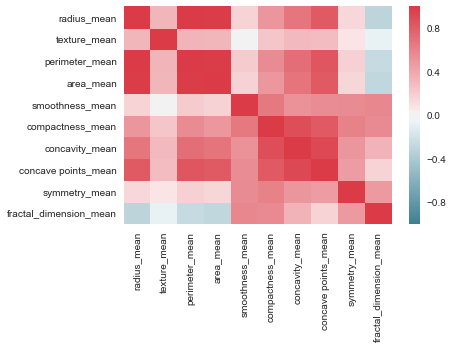

In [28]:
#Correlation heatmap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
print sns.heatmap(df_corr, cmap=cmap)

In [29]:
#group by target variable...count() may not be that informative, but can build on this.
df.groupby('diagnosis').count()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,357,357,357,357,357,357,357,357,357,357,...,357,357,357,357,357,357,357,357,357,0
M,212,212,212,212,212,212,212,212,212,212,...,212,212,212,212,212,212,212,212,212,0


In [30]:
#A targeted groupby is another approach.
df.groupby('diagnosis')['radius_mean'].count()

diagnosis
B    357
M    212
Name: radius_mean, dtype: int64

In [32]:
df.columns

Index([u'id', u'diagnosis', u'radius_mean', u'texture_mean', u'perimeter_mean',
       u'area_mean', u'smoothness_mean', u'compactness_mean',
       u'concavity_mean', u'concave points_mean', u'symmetry_mean',
       u'fractal_dimension_mean', u'radius_se', u'texture_se', u'perimeter_se',
       u'area_se', u'smoothness_se', u'compactness_se', u'concavity_se',
       u'concave points_se', u'symmetry_se', u'fractal_dimension_se',
       u'radius_worst', u'texture_worst', u'perimeter_worst', u'area_worst',
       u'smoothness_worst', u'compactness_worst', u'concavity_worst',
       u'concave points_worst', u'symmetry_worst', u'fractal_dimension_worst',
       u'Unnamed: 32'],
      dtype='object')

In [65]:
#This will re-index the dataframe so that the ID is the index
cols_to_keep_2 = df.columns[0:12]
df_part = df[cols_to_keep_2]
df_part.set_index(['id'], inplace=True)
df_part.index.name=None #will figure out how to get back index name
df_part.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [66]:
df_part['diagnosis'].iloc[0:20]

842302      M
842517      M
84300903    M
84348301    M
84358402    M
843786      M
844359      M
84458202    M
844981      M
84501001    M
845636      M
84610002    M
846226      M
846381      M
84667401    M
84799002    M
848406      M
84862001    M
849014      M
8510426     B
Name: diagnosis, dtype: object

In [70]:
#Change the diagnosis data from 'B' or 'M'; to 0 or 1
df_part.diagnosis.replace(('M', 'B'), (1, 0), inplace=True)
df_part['diagnosis'].iloc[0:20]

C:\Users\danke_000\Anaconda3\envs\py2\lib\site-packages\pandas\core\generic.py:3813: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


842302      1
842517      1
84300903    1
84348301    1
84358402    1
843786      1
844359      1
84458202    1
844981      1
84501001    1
845636      1
84610002    1
846226      1
846381      1
84667401    1
84799002    1
848406      1
84862001    1
849014      1
8510426     0
Name: diagnosis, dtype: int64

In [72]:
df_part.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean
842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


In [81]:
#Create verious patsy formulas and set up some train/test sets (in the event that they will be needed)
import patsy
from sklearn.cross_validation import train_test_split

formula_1 = 'diagnosis ~ radius_mean + texture_mean + perimeter_mean'
y_1, x_1 = patsy.dmatrices(formula_1, df_part, return_type='dataframe')
y_1 = y_1.values.ravel()
train_x_1, test_x_1, train_y_1, test_y_1 = train_test_split(x_1, y_1, train_size=0.75)

formula_2 = 'diagnosis ~ area_mean + smoothness_mean + compactness_mean'
y_2, x_2 = patsy.dmatrices(formula_2, df_part, return_type='dataframe')
y_2 = y_2.values.ravel()
train_x_2, test_x_2, train_y_2, test_y_2 = train_test_split(x_2, y_2, train_size=0.75)

formula_3 = 'diagnosis ~ concavity_mean + concave points_mean + symmetry_mean'
y_3, x_3 = patsy.dmatrices(formula_3, df_part, return_type='dataframe')
y_3 = y_3.values.ravel()
train_x_3, test_x_3, train_y_3, test_y_3 = train_test_split(x_3, y_3, train_size=0.75)

formula_4 = 'diagnosis ~ radius_mean + area_mean + symmetry_mean'
y_4, x_4 = patsy.dmatrices(formula_4, df_part, return_type='dataframe')
y_4 = y_4.values.ravel()
train_x_4, test_x_4, train_y_4, test_y_4 = train_test_split(x_4, y_4, train_size=0.75)